# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [402]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [403]:
df = pd.read_csv('ab_data.csv')
df.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


**b.** Use the cell below to find the number of rows in the dataset.

In [404]:
df.shape[0]     

294478

**c.** The number of unique users in the dataset.

In [405]:
df['user_id'].nunique()

290584

**d.** The proportion of users converted.

In [406]:
df['converted'].mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [407]:
len(df.query("group == 'treatment' & landing_page == 'old_page'"))

1965

**f.** Do any of the rows have missing values?

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [409]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
inc_data = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')].index
inc_data2 = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')].index
df.drop(inc_data, inplace=True)
df.drop(inc_data2, inplace=True)
df2 = df

In [410]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [411]:
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [412]:
duplicated = df2[df2['user_id'].duplicated()]


**c.** Display the rows for the duplicate **user_id**? 

In [413]:
print(duplicated)

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [414]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop(index=2893, inplace=True)

# Check again if the row with a duplicate user_id is deleted or not
df2[df2['user_id'].duplicated()]


,user_id,timestamp,group,landing_page,converted


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [415]:
converion_rate = df2['converted'].mean()
converion_rate

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [416]:
p_old = df2.query('group == "control"').converted.mean()
p_old

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [417]:
p_new = df2.query('group == "treatment"').converted.mean()
p_new

0.11880806551510564

>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [418]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = p_new - p_old
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [419]:
new_page_rate = df2.query("landing_page == 'new_page'").shape[0] / df2.shape[0]
new_page_rate

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

the differance in the conversion rate between the two pages is only 0.0015 such a small percent is not an indication that the new page is better or does it lead to more conversions, and the new_page_rate indicate that the new_page has a an equal probility to be recevied 

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

**In this case, there is a question associated with a direction - that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%  so this is one of the ways you could write the null and alternative. 
$$H_0: p_{old} - p_{new} \geq 0$$


$$H_1: p_{old} - p_{new} < 0$$

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [420]:
p_null = df2['converted'].mean()
p_null

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [421]:
p_null

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [422]:
n_new = df2[df2['landing_page'] == 'new_page']['converted'].shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [423]:
n_old = df2[df2['landing_page'] == 'old_page']['converted'].shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [424]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice(2, size=n_new, p=[1-p_null , p_null])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [425]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice(2, size=n_old, p=[1-p_null, p_null])
old_page_converted

array([0, 0, 0, ..., 0, 1, 0])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [426]:
p_new, p_old = new_page_converted.mean(), old_page_converted.mean()
p_new, p_old


(0.11862913770559494, 0.11911973236780153)


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [427]:
# Sampling distribution 
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice(2, size=n_new, p=[1-p_null, p_null])
    old_page_converted = np.random.choice(2, size=n_old, p=[1-p_null, p_null])
    p_diff = new_page_converted.mean() - old_page_converted.mean() 
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [428]:
diffs_mean = np.mean(p_diffs)

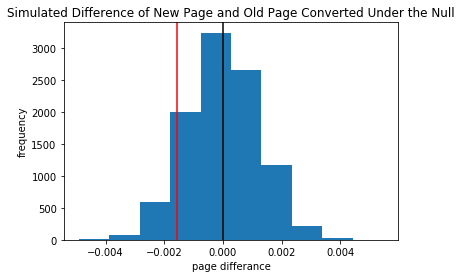

In [429]:
plt.hist(p_diffs)
plt.xlabel('page differance')
plt.ylabel('frequency')
plt.title('Simulated Difference of New Page and Old Page Converted Under the Null')
plt.axvline(x=(obs_diff), color='r')
plt.axvline(x=diffs_mean, color='black');


In [430]:
p_diffs = np.array(p_diffs)
p_diffs

array([  1.36757004e-03,  -2.01509681e-04,   9.40938947e-05, ...,
         5.48624394e-04,   3.14442345e-04,  -1.31645966e-03])

The simulated data creates a normal distribution (no skew) as expected due to how the data was generated. The mean of this normal distribution is 0, which which is what the data should look like under the null hypothesis.

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [431]:
(p_diffs > obs_diff).mean()

0.90510000000000002

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

#### what was computed is the p-value which is a measure of the probability that an observed difference could have occurred just by random chance. The lower the p-value, the greater the statistical significance of the observed difference, in this case the conversion rate, or one more extreme in favor of the alternative, if the null hypothesis is true. Since the p-value is higher than the Type I error rate of 5%, we fail to reject the null hypothesis, and that the treatment page does not have higher conversion rates than the control page on a statistically significant basis p-value = 0.094 while type 1 error rate is 0.05 p-value = 0.094 while type 1 error rate is 0.05 therefore we fail to reject the null 



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [432]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('group == "control" & converted == 1').shape[0]

# number of conversions with the new_page
convert_new = df2.query('group == "treatment" & converted == 1').shape[0]

# number of individuals who were shown the old_page
n_old = df2.shape[0] - df2.query('group == "control"').shape[0]

# number of individuals who received new_page
n_new = df2.query("group == 'treatment'").shape[0] 

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 



In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.


In [433]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
print(z_score, p_value)

-1.28629913797 0.900830658383


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

#### the z_score and p_value calculated are suggest that the conversion rates isn't statstically signficant therfore we fail to reject the null, the z_score means we are very close the mean null and the p-value means there is no statstically sinficant to reject the null 

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

logistic regression 

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [434]:
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head(2)
# this way the treatment is accounted as 1 while control as zero 

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [435]:
df2['intercept'] = 1 
ml = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = ml.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [436]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-04 18:58 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [437]:
# in logistic regression in order to interpret your coefficients efficiently we have to exponentiate it
expon_coff = np.exp(results.params)
expon_coff

intercept    0.136863
ab_page      0.985123
dtype: float64

In [438]:
# however becuase the coefficinets are now below one it would be more useful if we divide one over these results 
1 / expon_coff

intercept    7.306593
ab_page      1.015102
dtype: float64

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


#### the p-value associated with ab_page is 0.1899, becuase in this logistic hypotheses we were only concerned about about whither there is a difference in the conversion rates between the two pages while in the part two we were concernced about whose page had a higher conversion than the the other and also the p-values of Part 2 and 3 is because we have performed a one-tailed test in Part 2, and in Part 3, we are performing a two-tailed test.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

#### yes we should consider other factors, becuse the ap_page didn't show any statistical significance the disadvantage is that sometimes adding more factors can lead to false conclusions, also adding more factors reqiure more  more effort and time which in some cases might be a waste of time.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [439]:
# Read the countries.csv
df_countries = pd.read_csv('countries.csv', index_col='user_id')
df_merged = df2.set_index('user_id').join(df_countries, how='inner')


In [440]:
# Create the necessary dummy variables
df_merged[['UK','US','CA']] = pd.get_dummies(df_merged['country'])
df_merged.head(2)

,timestamp,group,landing_page,converted,ab_page,intercept,country,UK,US,CA
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1


In [441]:
lm1 = sm.Logit(df_merged['converted'], df_merged[['intercept','ab_page','US','CA']])
results1 = lm1.fit()
results1.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-04 18:58 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
CA             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [442]:
df_merged.head(2)

,timestamp,group,landing_page,converted,ab_page,intercept,country,UK,US,CA
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1


In [443]:
df_merged['US_ab_page'] = df_merged['US'] * df_merged['ab_page']
df_merged['CA_ab_page'] = df_merged['CA'] * df_merged['ab_page']
df_merged.head(2)

,timestamp,group,landing_page,converted,ab_page,intercept,country,UK,US,CA,US_ab_page,CA_ab_page
user_id,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1,0,0


In [444]:
# Fit your model, and summarize the results

lm3 = sm.Logit(df_merged['converted'], df_merged[['intercept','ab_page','US','CA','US_ab_page','CA_ab_page']])
results3 = lm3.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-04 18:58 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
CA             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
US_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
CA_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

In [445]:
# now exponentiate your coefficients
np.exp(results3.params)

intercept     0.134794
ab_page       0.934776
US            1.011854
CA            1.017682
US_ab_page    1.081428
CA_ab_page    1.048001
dtype: float64

In [446]:
# we divide one by the coefficints that are below one 
intercept_coff, ap_page_coff = 1/0.131332 , 1/0.985168
intercept_coff, ap_page_coff 

(7.614290500411172, 1.0150553002127556)

#### does the country (as an overall factor) or has any impact on the conversion or not ?

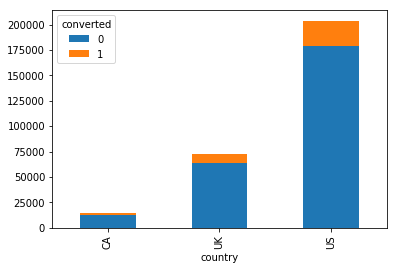

In [447]:
pd.crosstab(df_merged['country'],df_merged['converted']).plot.bar(stacked=True);


### no the plot above concludes that the country does not have an impact over conversion, the difference in conversion in the countries isn't that significant to be taken as evidence

### conclusion
the regression summary shows that none of the variables which are (country of origin or type of page based on their p-value are
not statistically significant therefore we fail to reject null hypothesis based on a  type 1 error 5% rate becuse all of them are above that percent, 
and the practical significance of all of this analysis does not seem required given that a .15 percent difference in the conversion rates between the control and treatment group was noted from the data earlier

In [448]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0